In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [5]:
#Tables
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [6]:
#create session
session = Session(engine)

# Precipitation Analysis

In [9]:
# Find most recent date to a year before
from datetime import datetime
most_current = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = most_current[0]
year_before = last_date.replace(year = (last_date.year - 1))
year_before = year_before.strftime("%Y-%m-%d")
year_before

'2016-08-23'

In [13]:
#query for precipitation data 
twelve_mon = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_before)

#create data frame from sql query
twelve_mon_prcp = pd.read_sql_query(twelve_mon.statement, engine, index_col = 'date')

twelve_mon_prcp.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


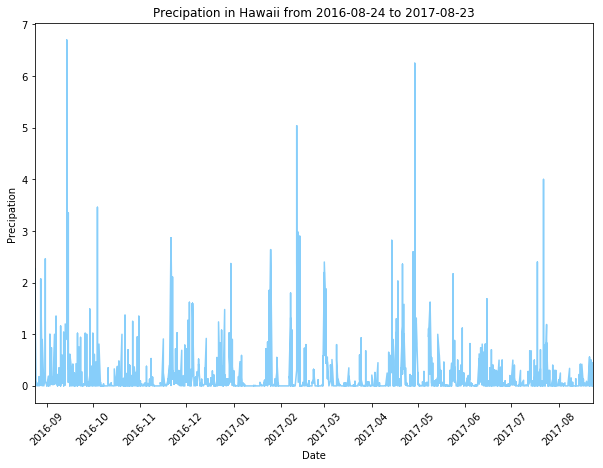

In [20]:
# Graph
twelve_mon_prcp.plot(figsize = (10,7), color="lightskyblue", rot = 45, use_index = True, legend=False)
plt.ylabel('Precipation')
plt.xlabel('Date')
plt.title("Precipation in Hawaii from %s to %s" % (twelve_mon_prcp.index.min(),twelve_mon_prcp.index.max()))
plt.show()

In [24]:
twelve_mon_prcp.describe()

,prcp
count,8060.000000
mean,0.176462
std,0.460203
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [27]:
# Create query to get station count
from sqlalchemy import func
num_stations = session.query(Station.station).group_by(Station.station).count()
num_stations

9

In [32]:
# Activity dataframe
activities = session.query(Station)

#create data frame from sql query
activities_df = pd.read_sql_query(activities, engine, index_col = 'station')

activities_df

ObjectNotExecutableError: Not an executable object: <sqlalchemy.orm.query.Query object at 0x0000026ECB32A9E8>